In [152]:
import sys
import cv2
import re
import csv

from skimage.feature import peak_local_max

from skspatial.objects import Points, Plane
from skspatial.plotting import plot_3d

from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray

sys.path.append('..')

In [153]:
%matplotlib notebook
import math as m
import numpy as np
from scipy import ndimage
from scipy.optimize import lsq_linear

import matplotlib
import matplotlib.pyplot as plt

from core import Core

from global_var import COLORS


In [154]:
matplotlib.rc('font', family='serif') 
matplotlib.rc('font', serif='Palatino Linotype') 
matplotlib.rc('text', usetex='false') 
matplotlib.rcParams.update({'font.size': 20})

In [155]:
folder = r'C:\SPRUP_data_Jenda\2019_03_13_Jenda_microscopy\20_12_11_BC5/'.replace('\\', '/')

file = 'raw_02_1'


core = Core(folder, file)
core.downsample(5)
core.type = 'diff'
print(len(core))

99


In [156]:
folder = r'D:\SPRUP_data_Jenda\21_01_28_BC5/'.replace('\\', '/')

file = 'raw_03_1'

data = np.load(folder + 'saved_data/' + file + '.npy')
# mask = data>0.1
# data[mask] = 1
# data = data.astype(int)

In [157]:
f = 263
# f = 464
# f = 554
f = 590

d =data[:,:,f]


<IPython.core.display.Javascript object>


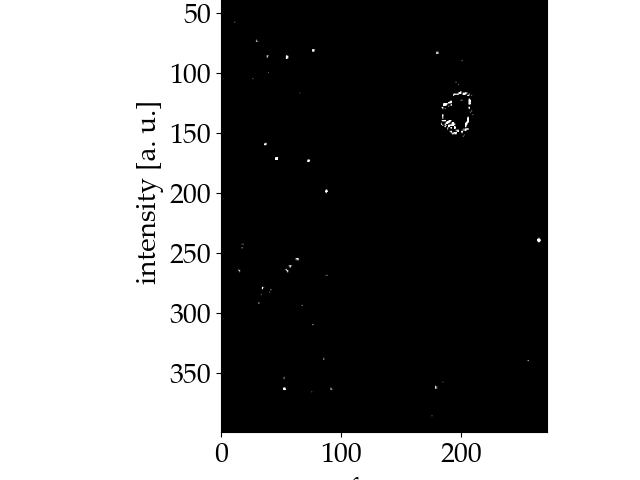

In [158]:
◘

<IPython.core.display.Javascript object>


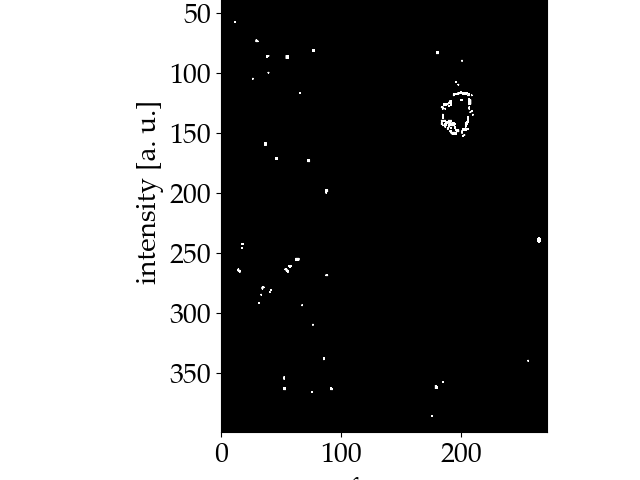

In [159]:

# data_threshold = (ndimage.maximum_filter(data, size=2) > 0.03) * 1
data_threshold = (data> 0.03) * 1

data_threshold = data_threshold.astype(np.uint8)
# data_threshold = ndimage.maximum_filter(data_threshold, size=5)

data_labeled, _ = ndimage.label(data_threshold, np.ones((3, 3, 3)))


fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1, 1])
axes.set_title(file)
axes.set_xlabel('frame')
axes.set_ylabel('intensity [a. u.]')
axes.imshow(
    data_threshold[:,:,f],
    cmap='gray',
    zorder=0,
    vmin=np.min(d)*0.2,
    vmax=np.max(d)*0.2
)

<IPython.core.display.Javascript object>


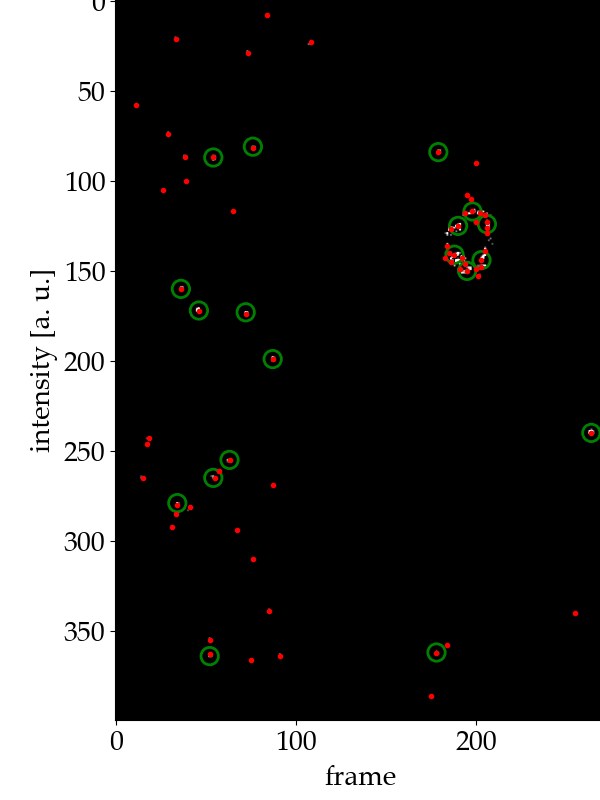

In [160]:
d =data[:,:,f]
# blobs_log = blob_log(ndimage.maximum_filter(d, size=5), min_sigma=2,max_sigma=5, num_sigma=10, threshold=0.02)
blobs_log = blob_log(d, min_sigma=2,max_sigma=5, num_sigma=10, threshold=0.02, overlap=0)

blobs_log[:, 2] = blobs_log[:, 2] * m.sqrt(2)+2

coordinates = peak_local_max(
    d, 
    min_distance=2,
    threshold_abs = 0.02,
    labels=data_labeled[:,:,f])


fig = plt.figure(figsize=(6, 8))
axes = fig.add_axes([0.1, 0.1, 1, 0.9])
axes.set_title(file)
axes.set_xlabel('frame')
axes.set_ylabel('intensity [a. u.]')

for blob in blobs_log:
        y, x, r = blob
        c = plt.Circle((x, y), r, color=COLORS[3], linewidth=2, fill=False)
        axes.add_patch(c)
        
axes.imshow(
#     data_threshold[:,:,f],
    d,
    cmap='gray',
    zorder=0,
    vmin=np.min(d)*0.2,
    vmax=np.max(d)*0.2
)
axes.plot(coordinates[:, 1], coordinates[:, 0], 'r.')

In [161]:
plane = Plane.best_fit(d)



fig = plt.figure(figsize=(8, 8))
axes = fig.add_axes([0.1, 0.1, 1, 1])
axes.set_title(file)
axes.set_xlabel('frame')
axes.set_ylabel('intensity [a. u.]')

        
axes.imshow(
    thresh_sauvola,
    cmap='gray',
    zorder=0,
    vmin=np.min(d)*0.2,
    vmax=np.max(d)*0.2
)


ValueError: The points must be 3D.

1

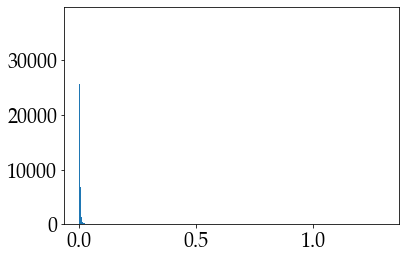

In [20]:
plt.hist(np.ravel(dstd[10:,10:]), 1000)
1

In [66]:
std = []
inten = []
for f in range(30, data.shape[2]):
    std.append(np.std(data[:,:,f]))
    inten.append(np.sum(data[:,:,f]))
    
    
std = np.array(std)
inten = np.array(inten)

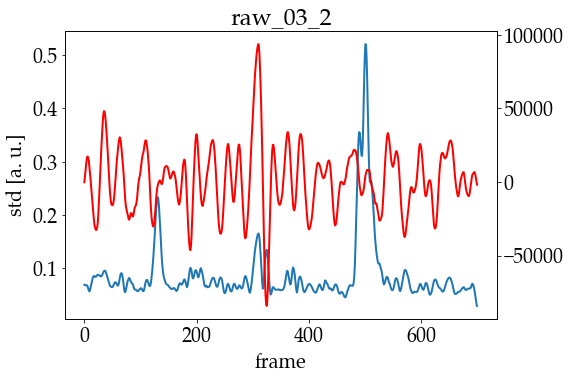

In [67]:
fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1, 1])
axes.set_title(file)
axes.set_xlabel('frame')
axes.set_ylabel('std [a. u.]')

axesi = axes.twinx()


axes.plot(std, linewidth=2)
axesi.plot(inten, linewidth=2, color = 'r')

    
# axes.set_ylim([0,axes.get_ylim()[1]*1.1])


fig.savefig('images/'+ file +'.png', dpi=300, bbox_inches='tight')    


In [15]:
a=np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

In [20]:
b = np.reshape(a, (5,-1))
print(b)

[[ 1  2]
 [ 3  4]
 [ 5  6]
 [ 7  8]
 [ 9 10]]


In [19]:
np.sum(b, axis=1)

array([ 3,  7, 11, 15, 19])

In [29]:
core.shape

(273, 400, 99)